### Workshop by Maria Grebenshchikova

This Python API tutorial aims to provide a very short introduction on how to get data for a data analysis project. 

To develop an understanding of strengths and limitations of popular news APIs, to be able to identify promising business applications of such data, and to be able to collect and process data for further analysis. A useful takeaway from the workshop will be the ability to understand how APIs work, collect news media data with API requests, and perform basic textual analysis.

Quick note: this workshop is better together with the course on textual analysis and web scrapping classes.

#### The outline:
* Introduction: who can benefit from news media?
* A very short introduction to APIs
* JSON files: how to handle it without a prior knowledge>
* Getting started: practical examples with the Guardian
* Cases!
* Natural Language Processing: getting the most out of words, sentences and phrases.

### Motivation

<img src="pic0.jpg" style="height:500px">
Source: Pepper...and Salt (WSJ)

#### Why news media are important?
* Influential media have a significant impact on beliefs of subscribers;
* Persuasion may be aimed at voters, donors, investors, and consumers;
* Biased and influential media are particularly critical - media bias. 

#### How do newsmakers communicate to subscribers about certain products/companies/technologies?
* Texts and images => textual analysis and facial recognition techniques;
* Texts and media bias: slanting information by selective choice of words, and varying credibility ascribed to the primary source” (Gentzkow and Shapiro, 2006) 
* Images and nonverbal bias: choosing images that form implicit biases.

#### Features of news media data:
   * Media slant their content in accordance with the beliefs of the audience;
   * In contrast to social media, the content is not not personalized;
   * => infer what particular audience may think of your technology.
   
   * Really BIG data: 
       * From 1851 to 2017, The New York Times published around 60,000 print issues containing about 3.5 million pages and 15 million articles.

####  Who can make the best use of such data?
   * Data Scientists in IB and Consulting gather information about public figures and companies;
   * Investors (e.g., venture capitalists) analyze market trends, most promising startups, technologies;
   * IT-consultants learn about state-of-the-art technologies in AI&ML;
   * (Business) analysts: go-to-market strategy, key players, analysis of competitors and consumers;
   * Researchers: how/why media slant information. How to measure media bias? What are consequences? What about editorial independence?
  

<img src="line.png">



### APIs
#### Application Programming Interfaces

The best media APIs to work with:

* <a href="https://developer.nytimes.com/" target="_blank">The Guardian</a>: we'll work with it today. Just love it! JSON files are full of information. However, it's hard to extract all news articles for more than 2 months (but it's possible! Check my <a href="https://github.com/mariascedasticity/Analysis-of-news-media/blob/master/Data%20collection/The_Guardian_data.ipynb" target="_blank">GitHub</a>);

* <a href="https://developer.nytimes.com/" target="_blank">New York Times</a>: similar to the Guardian, but doesn't provide full texts (web scrapping + monthly subscription helps). Also tricky to analysemultimedia such as images. If you're interested in NYT data, you can have a look at my code on <a href="https://github.com/mariascedasticity/Analysis-of-news-media/blob/master/Data%20collection/NYT%20data%20(API%2Bweb-scrapping).ipynb" target="_blank">GitHub</a>;

* <a href="https://github.com/currentsapi/currentsapi-python" target="_blank">Currents API</a>: amazing API by the most influential NLP developers - the Hugging Face team. Very easy to work with, but data history is limited to 6 months for the free account and 1 year for the paid ones.

* <a href="https://github.com/public-apis/public-apis" target="_blank">The list</a> of all popular APIs available for data analysis. Not only media, but also Music, Books, Geocoding, Cryptocurrency, and even Weather.

As you can see, all APIs have advantages and disadvantages. In this tutorial, we'll try The Guardian for educational purposes.

### The Guardian API

1. Register as a developer and sign up for an API key (<a href="https://bonobo.capi.gutools.co.uk/register/developer" target="_blank">here</a>).

2. Visit <a href="https://open-platform.theguardian.com/explore/" target="_blank">content explorer</a> to have an idea what data is included by quickly building queries and browsing the results without Python.

3. Visit <a href="https://open-platform.theguardian.com/documentation/" target="_blank">documentation</a> to get a comprehensive overview on  what data is available and how to extract what you need.

### API Requests

<img src="api_pic.png" style="height:500px">


<img src="line.png">


To get data from any API, we first need to generate a request.


Generally, the most common way for making requests and working with APIs is using the<a href="https://2.python-requests.org/en/master/" target="_blank"> requests library</a>.

In [3]:
# Let's install and import the library:

# To install the package: conda install requests
import requests

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#### Our First API Request

To send a request, we’ll use the `requests.get()` function, which takes one argument — the URL. In API world, this URL is called API endpoint.

The general idea of building the URL: endpoint + filtering parameters.

#### Guardian endpoints:

* Content (`/search`) returns all content available in the API. Example: https://content.guardianapis.com/search?q=netflix&api-key=test
* Tags (`/tags`) returns all tags in the API (more than 50,000).
* Sections (`/sections`) returns all sections in the API: technology, environment, business, ... https://content.guardianapis.com/sections?api-key=test
* Editions (`/editions`) returns all editions in the API (UK, US, Australia)
* Single item -  returns a piece of content, a tag, or a section.


In [5]:
# To create our first query, specify your own api key:
api_key = 'YOUR_KEY'

# Specify a particular endpoint (let's use `sections`):
api_endpoint = 'http://content.guardianapis.com/sections?'

# Specify a keyword (what you would put in a search field)
query = "business"

# Now, let's merge parameters to create URL using f-strings:

query_url = f"{api_endpoint}" \
            f"api-key={api_key}" \
            f"&q={query}"

# Let's look at the list of sections about business:
print(query_url)

http://content.guardianapis.com/sections?api-key=bcd94cd4-5529-4677-b6d5-10d88ee56a17&q=business


In [6]:
# Let's make a request to our API endpoint:

r = requests.get(query_url)
print(r)

<Response [200]>


In [7]:
# Another way we'll stick to:

api_endpoint = 'http://content.guardianapis.com/sections'

my_params = {
    'api-key': api_key,
    'q': "business"
}
r = requests.get(api_endpoint, my_params)

print(r)

<Response [200]>


The `get()` function returns a response object with the status code for our request. Status codes indicate what happened with a request query. Here are some codes that are relevant to `get()` requests:

* 200: Everything is ok, the result has been returned;
* 401: Server says you’re not authenticated;
* 404: Information you tried to access wasn’t found on the server.

Generally, requests with status codes that starts with '2' are successful, and with ‘4’ or ‘5’ are not. More about status codes is <a href="https://developer.mozilla.org/en-US/docs/Web/HTTP/Status" target="_blank">here</a>.

<img src="line.png">


#### Filtering parameters:

So far we've used only the keyword parameter `q=`. Luckily, there are more parameters to be set. Parameters are endpoint-specific. In this tutorial, we'll focus on `\search` endpoint to get relevant articles.

All information about search parameters is <a href="https://open-platform.theguardian.com/documentation/search" target="_blank">here</a>. 

We'll start with the following parameters:

| Key  | Value           | Description             |
| :------------- |:--------------|:--------------|
| section           | business  | Any section, for 'all' - leave it empty  |
| order-by          | newest | Alternatively, oldest, relevance  |
| show-fields         | all|  Specify a part of each article you want to extract |
| page-size           | 200  | It's a maximum (although The Guardian says 'up tp 50')   |
| api-key          |   your_key_here          |     |
| show-elements          |   image          |  Additionally, audio, video, all  |
| from-date          |   ...          |  Useful when you want to access all data and you need to loop by dates |
| to-date        |   ...          |    |



In [9]:
api_endpoint = 'http://content.guardianapis.com/search'

my_params = {
    'q': "design",
    'order-by': "newest",
    'show-fields': 'all',
    'page-size': 200,
    'api-key': api_key,
    'show-elements': 'image'
}

In [11]:
#make a request
r = requests.get(api_endpoint, my_params)
r

<Response [200]>

In [35]:
q = "https://content.guardianapis.com/search?q=donald%20duck&api-key=742843f5-3947-4ca3-8ef7-c2fecc2d4f74"
r = requests.get(q)
data = r.json() # .json()

<Response [200]>

Our request is successful. How to look at the data we extracted? Let's try `.json()` first.

<img src="json.png" style="height:500px">


### A very short intro to converting JSON Data to DataFrame in Python

JSON (JavaScript Object Notation) is the language of most API servers. In our case, we have the following structure of the output: `response` -> general information, including `results` with a list of articles and their metadata. It's hard to read data in JSON, we need to extract relevant information in readable format. Here's the sketch on how to proceed:

1. Get to `results`, where all articles are with `data['response']['results']`.
2. Use `pandas` package for data manipulation. In particular, `pd.json_normalize()` which takes as an argument JSON file and returns data as DataFrame.
3. Data clearing: select variables of interest & rename it for convenience.


In [13]:
# Let's import pandas library

import pandas as pd

In [19]:
# Let's create DataFrame
# How to get to 'results'?
df = pd.json_normalize(data['response']['results'])
df.head()

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName,fields.headline,fields.standfirst,fields.trailText,fields.byline,fields.main,fields.body,fields.wordcount,fields.firstPublicationDate,fields.isInappropriateForSponsorship,fields.isPremoderated,fields.lastModified,fields.newspaperEditionDate,fields.productionOffice,fields.publication,fields.shortUrl,fields.shouldHideAdverts,fields.showInRelatedContent,fields.thumbnail,fields.legallySensitive,fields.lang,fields.isLive,fields.bodyText,fields.charCount,fields.shouldHideReaderRevenue,fields.showAffiliateLinks,fields.bylineHtml,fields.newspaperPageNumber,fields.displayHint,fields.starRating,fields.commentCloseDate,fields.commentable,fields.liveBloggingNow,fields.sensitive
0,environment/2020/oct/28/amazon-removes-eco-bad...,article,environment,Environment,2020-10-28T16:17:20Z,Amazon removes 'eco' badge from flushable wipe...,https://www.theguardian.com/environment/2020/o...,https://content.guardianapis.com/environment/2...,False,pillar/news,News,Amazon removes 'eco' badge from flushable wipe...,<p>Environmental campaigners raise concerns ov...,Environmental campaigners raise concerns over ...,Sarah Marsh,"<figure class=""element element-image"" data-med...","<p>Disposable nappies, cotton buds , pet food ...",511,2020-10-28T16:17:20Z,false,false,2020-10-28T16:19:14Z,2020-10-29T00:00:00Z,UK,The Guardian,https://gu.com/p/f9f4f,false,true,https://media.guim.co.uk/e611c478ea04b39a1b2e0...,false,en,true,"Disposable nappies, cotton buds , pet food and...",3388,false,false,"<a href=""profile/sarah-marsh"">Sarah Marsh</a>",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,uk-news/2020/oct/28/police-spying-inquiry-exam...,article,uk-news,UK news,2020-10-28T15:00:47Z,Police spying inquiry to examine targeting of ...,https://www.theguardian.com/uk-news/2020/oct/2...,https://content.guardianapis.com/uk-news/2020/...,False,pillar/news,News,Police spying inquiry to examine targeting of ...,<p>Judge will hear evidence on undercover oper...,Judge will hear evidence on undercover operati...,"Rob Evans, Vikram Dodd and Paul Lewis","<figure class=""element element-image"" data-med...",<p>A public inquiry into undercover policing i...,1065,2020-10-28T15:00:47Z,false,false,2020-10-28T15:31:13Z,2020-10-29T00:00:00Z,UK,The Guardian,https://gu.com/p/f7x4t,false,true,https://media.guim.co.uk/b91e117672db3c3580e97...,false,en,true,A public inquiry into undercover policing is p...,6528,false,false,"<a href=""profile/robevans"">Rob Evans</a>, <a h...",1,immersive,NaN,NaN,NaN,NaN,NaN
2,film/2020/oct/28/target-number-one-review-grit...,article,film,Film,2020-10-28T15:00:47Z,Target Number One review – gritty thriller abo...,https://www.theguardian.com/film/2020/oct/28/t...,https://content.guardianapis.com/film/2020/oct...,False,pillar/arts,Arts,Target Number One review – gritty thriller abo...,<p>Antoine Olivier Pilon and Josh Hartnett are...,Antoine Olivier Pilon and Josh Hartnett are on...,Leslie Felperin,"<figure class=""element element-image"" data-med...","<p>Pulpy, structurally a touch otiose, but emi...",291,2020-10-28T15:00:47Z,false,false,2020-10-28T15:02:06Z,NaN,UK,theguardian.com,https://gu.com/p/f92m2,false,true,https://media.guim.co.uk/c0286e67341140dfe97e8...,false,en,true,"Pulpy, structurally a touch otiose, but eminen...",1765,false,true,"<a href=""profile/lesliefelperin"">Leslie Felper...",NaN,NaN,3,2020-11-25T00:00:00Z,true,NaN,NaN
3,sport/blog/2020/oct/28/bryson-dechambeau-overw...,article,sport,Sport,2020-10-28T14:58:46Z,Bryson DeChambeau overwhelming courses drives ...,https://www.theguardian.com/sport/blog/2020/oc...,https://content.guardianapis.com/sport/blog/20...,False,pillar/sport,Sport,Bryson DeChambeau overwhelming courses drives ...,"<p>David Abeles, president of leading manufact...",Bryson DeChambeau’s power is overwhelming cour...,Ewan Murray,"<figure class=""element element-image"" data-med...",<p>Golf’s flourishing as a pandemic-compliant ...,830,2020-

In [27]:
df.tail()

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName,fields.headline,fields.standfirst,fields.trailText,fields.byline,fields.main,fields.body,fields.wordcount,fields.firstPublicationDate,fields.isInappropriateForSponsorship,fields.isPremoderated,fields.lastModified,fields.newspaperEditionDate,fields.productionOffice,fields.publication,fields.shortUrl,fields.shouldHideAdverts,fields.showInRelatedContent,fields.thumbnail,fields.legallySensitive,fields.lang,fields.isLive,fields.bodyText,fields.charCount,fields.shouldHideReaderRevenue,fields.showAffiliateLinks,fields.bylineHtml,fields.newspaperPageNumber,fields.displayHint,fields.starRating,fields.commentCloseDate,fields.commentable,fields.liveBloggingNow,fields.sensitive
195,education/2020/oct/07/dyson-technology-institu...,article,education,Education,2020-10-07T05:00:29Z,Dyson technology institute to be given power t...,https://www.theguardian.com/education/2020/oct...,https://content.guardianapis.com/education/202...,False,pillar/news,News,Dyson technology institute to be given power t...,<p>Institute founded by Sir James Dyson will b...,Institute founded by Sir James Dyson will be f...,Richard Adams Education editor,"<figure class=""element element-image"" data-med...",<p>The technology institute founded by the inv...,381,2020-10-07T05:00:29Z,false,false,2020-10-07T05:00:29Z,2020-10-07T00:00:00Z,UK,The Guardian,https://gu.com/p/f35ez,false,true,https://media.guim.co.uk/440334a4be505392d07f8...,false,en,true,The technology institute founded by the invent...,2286,false,false,"<a href=""profile/richardadams"">Richard Adams</...",19,NaN,NaN,NaN,NaN,NaN,NaN
196,world/2020/oct/07/berlin-new-airport-covid-ger...,article,world,World news,2020-10-07T04:00:27Z,'We were a laughing stock': Berlin airport fin...,https://www.theguardian.com/world/2020/oct/07/...,https://content.guardianapis.com/world/2020/oc...,False,pillar/news,News,'We were a laughing stock': Berlin airport fin...,"<p>Berlin-Brandenburg Willy Brandt Airport, €4...","Berlin-Brandenburg Willy Brandt Airport, €4bn ...",Kate Connolly in Berlin,"<figure class=""element element-image"" data-med...",<p>Almost three decades after the plans were f...,1063,2020-10-07T04:00:27Z,false,false,2020-10-07T04:00:28Z,2020-10-07T00:00:00Z,UK,The Guardian,https://gu.com/p/fx24x,false,true,https://media.guim.co.uk/627a6d5cafb4617820ab0...,false,en,true,Almost three decades after the plans were firs...,6335,false,false,"<a href=""profile/kateconnolly"">Kate Connolly</...",30,NaN,NaN,NaN,NaN,NaN,NaN
197,us-news/live/2020/oct/06/donald-trump-coronavi...,liveblog,us-news,US news,2020-10-07T01:12:07Z,Next debate should be cancelled if president s...,https://www.theguardian.com/us-news/live/2020/...,https://content.guardianapis.com/us-news/live/...,False,pillar/news,News,Next debate should be cancelled if president s...,<ul><li>This blog is closed. Follow coronaviru...,More than 18 officials and staff in the presid...,Maanvi Singh (now) and Joanna Walters and Mart...,"<figure class=""element element-image"" data-med...","<div id=""block-5f7d14ec8f0875963515a953"" class...",16504,2020-10-06T06:43:37Z,false,false,2020-10-07T02:22:20Z,NaN,US,theguardian.com,https://gu.com/p/f32vx,false,true,https://media.guim.co.uk/0422d27cf27790a89d42c...,false,en,true,The Guardian’s global coverage of the coronavi...,100193,false,false,"<a href=""profile/maanvi-singh"">Maanvi Singh</a...",NaN,NaN,NaN,NaN,NaN,false,NaN
198,fashion/2020/oct/06/chiffon-face-masks-and-cha...,article,fashion,Fashion,2020-10-06T16:00:44Z,Chiffon face masks and chainmail balaclavas: a...,https://www.theguardian.com/fashion/2020/oct/0...,https://content.guardianapis.com/fashion/2020/...,False,pillar/lifestyle,Lifestyle,Chiffon face masks and chainmail balaclavas: a...,<p>The first proper fashion month to take plac...,The first proper fashion month to take place d...,Jess Cartner-Morley,"<figure class=""element element-image"" data-med...",<p>

In [18]:
pd.set_option('max_columns', 100)

In [20]:
# how many rows and columns do we have?
df.shape

(200, 44)

In [21]:
# display names of variables
df.columns

Index(['id', 'type', 'sectionId', 'sectionName', 'webPublicationDate',
       'webTitle', 'webUrl', 'apiUrl', 'isHosted', 'pillarId', 'pillarName',
       'fields.headline', 'fields.standfirst', 'fields.trailText',
       'fields.byline', 'fields.main', 'fields.body', 'fields.wordcount',
       'fields.firstPublicationDate', 'fields.isInappropriateForSponsorship',
       'fields.isPremoderated', 'fields.lastModified',
       'fields.newspaperEditionDate', 'fields.productionOffice',
       'fields.publication', 'fields.shortUrl', 'fields.shouldHideAdverts',
       'fields.showInRelatedContent', 'fields.thumbnail',
       'fields.legallySensitive', 'fields.lang', 'fields.isLive',
       'fields.bodyText', 'fields.charCount', 'fields.shouldHideReaderRevenue',
       'fields.showAffiliateLinks', 'fields.bylineHtml',
       'fields.newspaperPageNumber', 'fields.displayHint', 'fields.starRating',
       'fields.commentCloseDate', 'fields.commentable',
       'fields.liveBloggingNow', 'fields

In [24]:
# Data clearing: select variables of interest

df_subset=df[['type','id', 'sectionName', 'webPublicationDate', 'webTitle',\
                   'fields.shortUrl', 'pillarName', 'fields.headline', 'fields.standfirst', \
                   'fields.wordcount', 'fields.bodyText', 'fields.thumbnail']]

# Renaming variables

df_subset.rename(columns={"webPublicationDate": "date", "fields.standfirst": "snippet", \
                        "fields.shortUrl": "url", "fields.wordcount": "wordcount", "sectionName": "section", \
                        "fields.bodyText": "article_text", "fields.thumbnail": "image", \
                       "fields.headline": "headline"}, inplace = True)

# Dates

df_subset['date']=pd.to_datetime(df_subset['date']).dt.strftime('%Y-%m-%d')


In [25]:
# The final DataFrame looks like:
df_subset.head()

,type,id,section,date,webTitle,url,pillarName,headline,snippet,wordcount,article_text,image
0,article,environment/2020/oct/28/amazon-removes-eco-bad...,Environment,2020-10-28,Amazon removes 'eco' badge from flushable wipe...,https://gu.com/p/f9f4f,News,Amazon removes 'eco' badge from flushable wipe...,<p>Environmental campaigners raise concerns ov...,511,"Disposable nappies, cotton buds , pet food and...",https://media.guim.co.uk/e611c478ea04b39a1b2e0...
1,article,uk-news/2020/oct/28/police-spying-inquiry-exam...,UK news,2020-10-28,Police spying inquiry to examine targeting of ...,https://gu.com/p/f7x4t,News,Police spying inquiry to examine targeting of ...,<p>Judge will hear evidence on undercover oper...,1065,A public inquiry into undercover policing is p...,https://media.guim.co.uk/b91e117672db3c3580e97...
2,article,film/2020/oct/28/target-number-one-review-grit...,Film,2020-10-28,Target Number One review – gritty thriller abo...,https://gu.com/p/f92m2,Arts,Target Number One review – gritty thriller abo...,<p>Antoine Olivier Pilon and Josh Hartnett are...,291,"Pulpy, structurally a touch otiose, but eminen...",https://media.guim.co.uk/c0286e67341140dfe97e8...
3,article,sport/blog/2020/oct/28/bryson-dechambeau-overw...,Sport,2020-10-28,Bryson DeChambeau overwhelming courses drives ...,https://gu.com/p/f9fzh,Sport,Bryson DeChambeau overwhelming courses drives ...,"<p>David Abeles, president of leading manufact...",830,Golf’s flourishing as a pandemic-compliant spo...,https://media.guim.co.uk/e65d0a6836e327bc5726b...
4,article,lifeandstyle/2020/oct/28/the-best-new-design-t...,Life and style,2020-10-28,"The best new design this month, from walking w...",https://gu.com/p/f76fv,Lifestyle,"The best new design this month, from walking w...",<p>News and design stories from around the wor...,2196,As lockdown confusion reigns and rules about w...,https://media.guim.co.uk/516ffa3dd1dadc58ae183...


In [28]:
# Let's have a look at values .at
df_subset.at[10, 'article_text']

'There are crucial gaps in the data available to map England’s response to Covid-19, according to researchers who have developed an interactive, visual tool condensing disparate streams of publicly available information to help the public make sense of the numbers. The one-stop dashboard – developed by an interdisciplinary research team from University College London (UCL) – found substantial shortcomings in the quality, consistency and availability of reliable figures required to manage the pandemic. For example, there is no routine data collected on how well requests for 14-day isolation are adhered to, rendering it essentially impossible to know how effective NHS Test and Trace is in reducing transmission. The number of people isolating with symptoms in England is also unknown, and there is also no data on those who need or are receiving any kind of support, the researchers said. “We don’t know what percentage of people with symptoms and a positive test are actually isolating for th

In [32]:
# Let's have a look at url .at
print(df_subset.at[10, 'url'])

https://gu.com/p/f99kz


In [34]:
# Let's have a look at images .at
print(df_subset.at[10, 'image'])

https://media.guim.co.uk/6c17d20867ad9e0e3e33921548a97907b6a875a0/0_117_3500_2101/500.jpg


<img src="line.png">


Now, we have a clear understanding of how we can send requests and get data we're looking for. I suggest you to work on one of proposed cases. 


### Case #1: FoodTech startups

Imagine that your company/fund decided to invest in an early-stage fast-growing foodtech startup. Such startups may use controversial technologies such as Genetically modified organisms (GMOs). You heard that genetically modified crops have been vilified and banned. However, the science is clear: they’re safe and, what’s more, the world desperately needs them. 

Risks are high, but the potential demand may be large too. Today the environment is rapidly changing and new market leaders can appear. Looks like a promising market to look at. Your company wants to make use of the upcoming Food Revolution and FoodTech market trends. However, your boss wants to understand whether people are ready for GMOs and is there a large potential demand for it. She/he asked you to prepare a short executive summary at the end of the day. You also know that your boss favors non-standard approaches.

One way to approach such questions is to have a look at how GMOs are covered in major news media. Which arguments are highlighted in negative and positive articles? Which words/phrases frequently appear in articles about GMOs? You don’t have much time to read all articles. 

### Case #2: Startup socialization

Imagine that you just started your job at a startup. Although your company at an early stage, your colleagues know all about worldwide trends, successful exits and IPOs. To prove yourself, you need to be able to speak about current IPO news, and you are going to read recent articles on this topic. You have one night to catch up.

### Case #3: Customized query

Feel free to investigate any topics of your choice (AI, Coronavirus, Trump, American elections, Moomintroll, etc.) or continue with IPO.

In [36]:
api_endpoint = 'http://content.guardianapis.com/search'

my_params = {
    'q': "GMO",
    'order-by': "newest",
    'show-fields': 'all',
    'page-size': 200,
    'api-key': api_key,
    'show-elements': 'image'
}

r = requests.get(api_endpoint, my_params)
r

<Response [200]>

In [37]:
data = r.json()

In [38]:
df = pd.json_normalize(data['response']['results'])
df.head()

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName,fields.headline,fields.standfirst,fields.trailText,fields.byline,fields.main,fields.body,fields.wordcount,fields.firstPublicationDate,fields.isInappropriateForSponsorship,fields.isPremoderated,fields.lastModified,fields.productionOffice,fields.publication,fields.shortUrl,fields.shouldHideAdverts,fields.showInRelatedContent,fields.thumbnail,fields.legallySensitive,fields.lang,fields.isLive,fields.bodyText,fields.charCount,fields.shouldHideReaderRevenue,fields.showAffiliateLinks,fields.bylineHtml,fields.newspaperPageNumber,fields.commentCloseDate,fields.commentable,fields.newspaperEditionDate,fields.liveBloggingNow,fields.starRating,fields.displayHint,fields.contributorBio,fields.sensitive
0,science/2020/sep/14/surrogate-sires-could-crea...,article,science,Science,2020-09-14T21:12:46Z,'Surrogate sires' could create specially bred ...,https://www.theguardian.com/science/2020/sep/1...,https://content.guardianapis.com/science/2020/...,False,pillar/news,News,'Surrogate sires' could create specially bred ...,<p>Trials on mice show how sterile animals can...,Successful trials on mice show potential to pr...,Natalie Grover Science correspondent,"<figure class=""element element-image"" data-med...",<p>Scientists have used gene-editing to create...,639,2020-09-14T21:12:46Z,false,false,2020-09-14T21:43:14Z,UK,theguardian.com,https://gu.com/p/ezt89,false,true,https://media.guim.co.uk/a97e52aa619d3043fb996...,false,en,true,Scientists have used gene-editing to create pi...,4109,false,false,"<a href=""profile/natalie-grover"">Natalie Grove...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,business/nils-pratley-on-finance/2020/aug/19/w...,article,business,Business,2020-08-19T18:55:11Z,What explains markets' rip-roaring success in ...,https://www.theguardian.com/business/nils-prat...,https://content.guardianapis.com/business/nils...,False,pillar/news,News,What explains markets' rip-roaring success in ...,<p>One can get Apple’s boom but we’re seeing n...,One can get Apple’s boom but we’re seeing noti...,Nils Pratley,"<figure class=""element element-image"" data-med...","<p>Apple’s <a href=""https://www.theguardian.co...",762,2020-08-19T18:55:11Z,false,false,2020-08-19T20:39:38Z,UK,The Guardian,https://gu.com/p/ety8q,false,true,https://media.guim.co.uk/43eb56d587967f0d76a0f...,false,en,true,"Apple’s rise to a valuation of $2tn, only five...",4666,false,false,"<a href=""profile/nilspratley"">Nils Pratley</a>",31,2020-08-22T18:55:11Z,true,2020-08-20T00:00:00Z,NaN,NaN,NaN,NaN,NaN
2,sport/2020/jul/17/tom-brady-tb12-snake-oil-jun...,article,sport,Sport,2020-07-17T07:00:08Z,Tom Brady's pseudoscientific wellness racket i...,https://www.theguardian.com/sport/2020/jul/17/...,https://content.guardianapis.com/sport/2020/ju...,False,pillar/sport,Sport,Tom Brady's pseudoscientific wellness racket i...,<p>The ageless NFL star is selling a dream wit...,The ageless NFL star is selling a dream with h...,Bryan Armen Graham,"<figure class=""element element-image"" data-med...","<p>Football is America’s most democratic game,...",1167,2020-07-17T07:00:08Z,false,false,2020-07-17T12:00:24Z,US,theguardian.com,https://gu.com/p/eabqd,false,true,https://media.guim.co.uk/e491461b0efa404214672...,false,en,true,"Football is America’s most democratic game, st...",7345,false,false,"<a href=""profile/bryan-armen-graham"">Bryan Arm...",NaN,2020-07-20T07:00:08Z,true,NaN,NaN,NaN,NaN,NaN,NaN
3,world/live/2020/jul/11/coronavirus-australias-...,liveblog,world,World news,2020-07-11T23:27:38Z,"Coronavirus: global deaths tally over 560,000 ...",https://www.theguardian.com/world/live/2020/ju...,https://content.guardianapis.com/world/live/20...,False,pillar/news,News,"Coronavirus: global deaths tally over 560,000 ...","<p>This blog has closed – <a href=""https://www...",Australian state of Victoria reports 216 new c...,"Jedidajah Otte (now), Damien Gayle, Aaron Wala...","<figure class=""element el

In [39]:
df.shape

(200, 45)

In [40]:
# Data clearing: select variables of interest

df_subset=df[['type','id', 'sectionName', 'webPublicationDate', 'webTitle',\
                   'fields.shortUrl', 'pillarName', 'fields.headline', 'fields.standfirst', \
                   'fields.wordcount', 'fields.bodyText', 'fields.thumbnail']]

# Renaming variables

df_subset.rename(columns={"webPublicationDate": "date", "fields.standfirst": "snippet", \
                        "fields.shortUrl": "url", "fields.wordcount": "wordcount", "sectionName": "section", \
                        "fields.bodyText": "article_text", "fields.thumbnail": "image", \
                       "fields.headline": "headline"}, inplace = True)

# Dates

df_subset['date']=pd.to_datetime(df_subset['date']).dt.strftime('%Y-%m-%d')


In [41]:
df_subset.head()

,type,id,section,date,webTitle,url,pillarName,headline,snippet,wordcount,article_text,image
0,article,science/2020/sep/14/surrogate-sires-could-crea...,Science,2020-09-14,'Surrogate sires' could create specially bred ...,https://gu.com/p/ezt89,News,'Surrogate sires' could create specially bred ...,<p>Trials on mice show how sterile animals can...,639,Scientists have used gene-editing to create pi...,https://media.guim.co.uk/a97e52aa619d3043fb996...
1,article,business/nils-pratley-on-finance/2020/aug/19/w...,Business,2020-08-19,What explains markets' rip-roaring success in ...,https://gu.com/p/ety8q,News,What explains markets' rip-roaring success in ...,<p>One can get Apple’s boom but we’re seeing n...,762,"Apple’s rise to a valuation of $2tn, only five...",https://media.guim.co.uk/43eb56d587967f0d76a0f...
2,article,sport/2020/jul/17/tom-brady-tb12-snake-oil-jun...,Sport,2020-07-17,Tom Brady's pseudoscientific wellness racket i...,https://gu.com/p/eabqd,Sport,Tom Brady's pseudoscientific wellness racket i...,<p>The ageless NFL star is selling a dream wit...,1167,"Football is America’s most democratic game, st...",https://media.guim.co.uk/e491461b0efa404214672...
3,liveblog,world/live/2020/jul/11/coronavirus-australias-...,World news,2020-07-11,"Coronavirus: global deaths tally over 560,000 ...",https://gu.com/p/eav5y,News,"Coronavirus: global deaths tally over 560,000 ...","<p>This blog has closed – <a href=""https://www...",19329,This blog has closed – thanks for following. C...,https://media.guim.co.uk/c92b00b77859a028e8b56...
4,article,food/2020/jun/13/pour-thing-what-different-soy...,Food,2020-06-12,Pour thing: what different soy sauces are used...,https://gu.com/p/e3jg9,Lifestyle,Pour thing: what different soy sauces are used...,<p>If you’ve ever cooked Asian food and had th...,1391,"During the Han dynasty, more than 2,000 years ...",https://media.guim.co.uk/11654346c32fb5c871158...


In [44]:
df_subset.at[2, 'article_text']

'Football is America’s most democratic game, still, despite any incremental decline in participation, the most popular of all high school sports by far. It’s for country kids and it’s for city kids. It’s for black kids and it’s for white kids. You can be fat and play on the line. You can be skinny and play wide receiver. Or you can be an unremarkable athlete like Tom Brady and win multiple Super Bowls. That appraisal might come off a wee bit harsh for a living legend regarded by many as the greatest of all quarterbacks, the position that’s been called the most demanding in team sports. But there was indeed a time – before the six NFL titles and nine Super Bowl appearances (records both), the Tag Heuer ads and glossy magazine covers, the tabloid-fodder romances with Hollywood starlets and Brazilian supermodels – when Brady was decidedly one of us: a lightly regarded prospect with a nascent dad bod selected in the later rounds of the 2000 draft as an understudy to an established star. Ev

In [48]:
print(df_subset.at[4, 'url'])

https://gu.com/p/e3jg9


In [49]:
print(df_subset.at[4, 'image'])

https://media.guim.co.uk/11654346c32fb5c8711584a455e4d9af573e2f86/0_11_5760_3456/500.jpg


<img src="line.png">


## Part II: Text Analysis

In [50]:
#conda install -c conda-forge textblob
from textblob import TextBlob


In [ ]:
!pip install textblob

In [51]:
df_subset['sentiment'] = df_subset.article_text.map(lambda text: TextBlob(text).sentiment.polarity)


In [52]:
df_subset

,type,id,section,date,webTitle,url,pillarName,headline,snippet,wordcount,article_text,image,sentiment
0,article,science/2020/sep/14/surrogate-sires-could-crea...,Science,2020-09-14,'Surrogate sires' could create specially bred ...,https://gu.com/p/ezt89,News,'Surrogate sires' could create specially bred ...,<p>Trials on mice show how sterile animals can...,639,Scientists have used gene-editing to create pi...,https://media.guim.co.uk/a97e52aa619d3043fb996...,0.076732
1,article,business/nils-pratley-on-finance/2020/aug/19/w...,Business,2020-08-19,What explains markets' rip-roaring success in ...,https://gu.com/p/ety8q,News,What explains markets' rip-roaring success in ...,<p>One can get Apple’s boom but we’re seeing n...,762,"Apple’s rise to a valuation of $2tn, only five...",https://media.guim.co.uk/43eb56d587967f0d76a0f...,0.049210
2,article,sport/2020/jul/17/tom-brady-tb12-snake-oil-jun...,Sport,2020-07-17,Tom Brady's pseudoscientific wellness racket i...,https://gu.com/p/eabqd,Sport,Tom Brady's pseudoscientific wellness racket i...,<p>The ageless NFL star is selling a dream wit...,1167,"Football is America’s most democratic game, st...",https://media.guim.co.uk/e491461b0efa404214672...,0.100436
3,liveblog,world/live/2020/jul/11/coronavirus-australias-...,World news,2020-07-11,"Coronavirus: global deaths tally over 560,000 ...",https://gu.com/p/eav5y,News,"Coronavirus: global deaths tally over 560,000 ...","<p>This blog has closed – <a href=""https://www...",19329,This blog has closed – thanks for following. C...,https://media.guim.co.uk/c92b00b77859a028e8b56...,0.084708
4,article,food/2020/jun/13/pour-thing-what-different-soy...,Food,2020-06-12,Pour thing: what different soy sauces are used...,https://gu.com/p/e3jg9,Lifestyle,Pour thing: what different soy sauces are used...,<p>If you’ve ever cooked Asian food and had th...,1391,"During the Han dynasty, more than 2,000 years ...",https://media.guim.co.uk/11654346c32fb5c871158...,0.134818
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,article,science/2008/apr/27/medicalresearch.agriculture,Science,2008-04-26,A genetic gamble?,https://gu.com/p/xbxyd,News,A genetic gamble?,"Be it for medical or industrial ends, advances...",698,Humans have been unwittingly altering the gene...,NaN,0.093738
196,article,environment/2008/apr/16/carbonemissions.climat...,Environment,2008-04-15,Eco Soundings: Digging an ethical hole | Spyin...,https://gu.com/p/xamm6,News,Eco Soundings,NaN,592,Digging an ethical hole The giant Ffos-y-Fran ...,NaN,0.026485
197,article,commentisfree/2008/feb/07/haltinggrowth,Opinion,2008-02-07,Halting growth,https://gu.com/p/xcxhg,Opinion,Halting growth,European protectionism is denying farmers acce...,1011,There's been a new furore in France about GM c...,NaN,0.075516
198,article,environment/2008/jan/30/1,Environment,2008-01-30,John Vidal: Eco Soundings,https://gu.com/p/x2mgf,News,Eco Soundings,NaN,630,Winging it The RSPB leads calls for carbon car...,NaN,0.052434


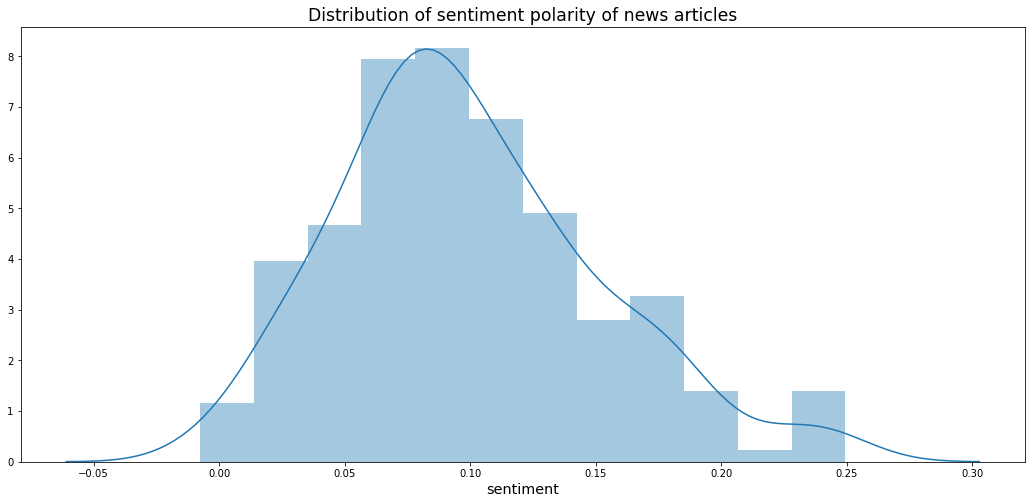

In [53]:
# vizualization tools
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


mpl.rcParams['figure.figsize'] = (18, 8)
mpl.rcParams['axes.titlesize'] = 'xx-large'
mpl.rcParams['axes.labelsize'] = 'x-large'
sns.distplot(df_subset.sentiment);
plt.title("Distribution of sentiment polarity of news articles");

In [59]:
# let's print random headlines with highest positive sentiment polarity
list_art = df_subset.loc[df_subset.sentiment>0.1, ['headline']].sample(5).values

for l in list_art:
    print(l[0])
    print()


Europe's new GM laws offer hope – but we must remain vigilant

Private firms should contribute more to foreign aid, says Bill Gates

Chipotle removes all GMO ingredients from its menu

Can fast-growing Alter Eco push the envelope on sustainability?

FA Cup clockwatch: Man City 4-1 Port Vale, Watford 3-3 Tranmere – as it happened



In [57]:
list_art

array([['Big pharma, tobacco, tech - how the first amendment is being abused'],
       ['Neil Young: The Monsanto Years review – quasi-punk love songs for the planet'],
       ["Campbell's GMO labeling is great – but it would have been better 24 years ago"],
       ['Latest chicken recalls highlight a big gap in supply chain transparency'],
       ["Europe's new GM laws offer hope – but we must remain vigilant"]],
      dtype=object)

In [62]:
# let's print random headlines with negative sentiment polarity

# let's print random headlines with highest positive sentiment polarity
list_art_neg = df_subset.loc[df_subset.sentiment<0, ['headline']].sample(1).values

for l in list_art_neg:
    print(l[0])
    print()

GM crops: organic farmer loses court case over alleged contamination



In [69]:
# natural language processing: n-gram ranking
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
# add custom words that will be ignored in the analysis
ADDITIONAL_STOPWORDS = ['gmo', 'genetically', 'modified', 'gm', 'food']
import matplotlib.pyplot as plt

In [70]:
def cleaning_text(text):
  """
  Function to clean the data. All the words that
  are not included in a stop word list is lemmatized after
  encoding. Additionally, regex parsing is performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [71]:
words = cleaning_text(''.join(str(df_subset['article_text'].tolist())))

In [67]:
words[:20]

['scientist',
 'used',
 'geneediting',
 'create',
 'pig',
 'goat',
 'cattle',
 'serve',
 'socalled',
 'surrogate',
 'sire',
 'male',
 'animal',
 'providing',
 'sperm',
 'carry',
 'genetic',
 'trait',
 'elite',
 'donor']

In [ ]:
# Let's have a look at some words

In [72]:
# count bigrams and show the most frequent

(pd.Series(nltk.ngrams(words, 2)).value_counts())[:10]

(golden, rice)       118
(last, year)          88
(climate, change)     88
(new, york)           78
(year, ago)           59
(last, week)          54
(around, world)       47
(supply, chain)       43
(prime, minister)     43
(new, case)           41
dtype: int64

In [73]:
# count trigrams and show the most frequent
(pd.Series(nltk.ngrams(words, 3)).value_counts())[:10]

(new, york, time)                      18
(content, editorially, independent)    17
(new, south, wale)                     17
(except, piece, labelled)              17
(like, direct, inbox)                  17
(independent, except, piece)           17
(editorially, independent, except)     17
(story, like, direct)                  17
(get, story, like)                     17
(member, get, story)                   16
dtype: int64

In [74]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:30]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:30]

Text(0.5, 0, '# of Occurances')

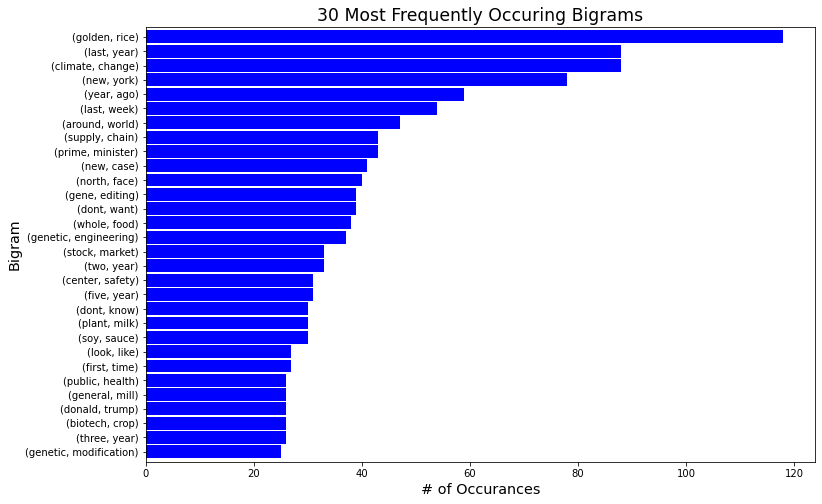

In [75]:
# let's vizualize data in HSE Brandbook's colors:
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('30 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

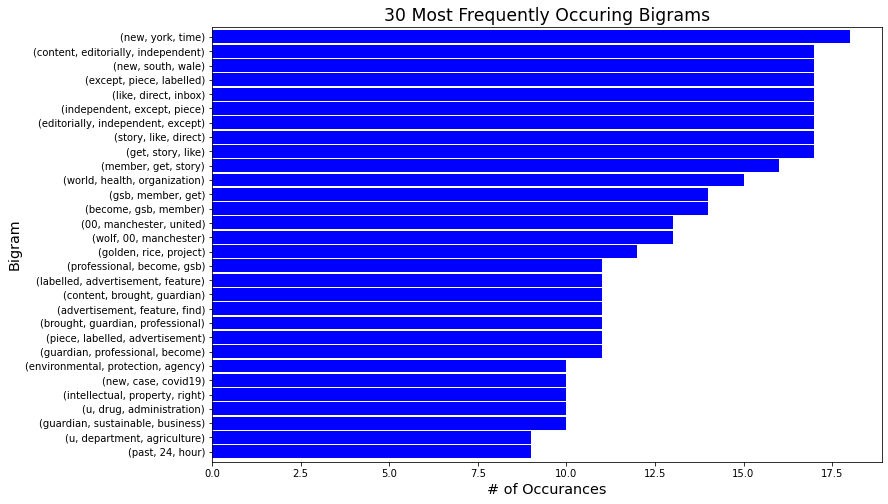

In [76]:
# let's vizualize data in HSE Brandbook's colors:
trigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('30 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

<img src="line.png">


In [77]:
df_subset.to_csv('news_data.csv')